<h1 style = "font-size:3rem;color:orange">Applying Filters to Audio Files</h1>

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd 

import librosa                    
import librosa.display 

In [122]:
# create a noisy input
rng = np.random.default_rng()
sr = 48000

data = np.random.rand(sr) * 2 - 1

print(np.shape(data))
#data , sr  = librosa.load('../samples/06 Carillon de mÇtal.wav')
ipd.Audio(data,rate=sr)

(48000,)


In [137]:
# simple first order IIR high pass filter


def high_pass(data):
    y = np.zeros(len(data))
    for n in range(1,len(data)):
        y[n] = 0.3 * data[n] - 0.8 * y[n-1]
    return y

In [138]:
# apply
data_filtered = high_pass(data)
ipd.Audio(data_filtered,rate=sr)

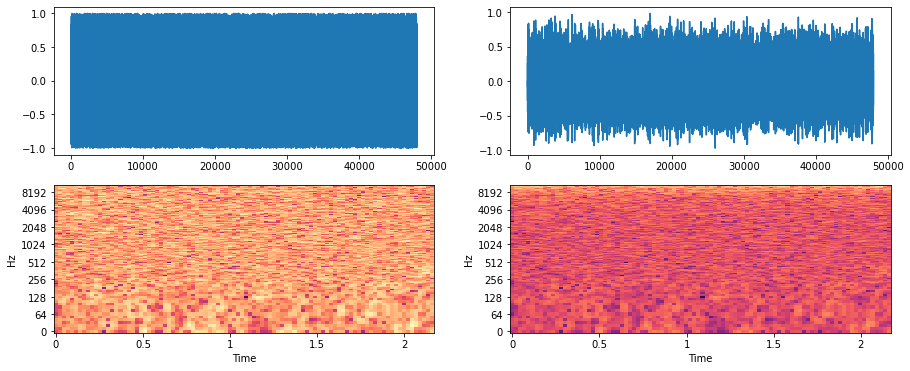

In [139]:
# plot signal in time and frequency domain

plt.figure(figsize=(15, 6))

plt.subplot(2,2,1)
plt.plot(data)
plt.subplot(2,2,2)
plt.plot(data_filtered)

plt.subplot(2,2,3)
STFT = abs(librosa.stft(data))
STFT_db = librosa.amplitude_to_db(abs(STFT), ref=np.max)
img = librosa.display.specshow(STFT_db,
                               y_axis='log',
                               x_axis='time')
plt.subplot(2,2,4)
STFT_filtered = abs(librosa.stft(data_filtered))
STFT_db_filtered = librosa.amplitude_to_db(abs(STFT_filtered), ref=np.max)
img = librosa.display.specshow(STFT_db_filtered,
                               y_axis='log',
                               x_axis='time')

plt.show()

<h1 style = "font-size:3rem;color:orange">Built-in filters using Scipy</h1>

In [140]:
import scipy as sp

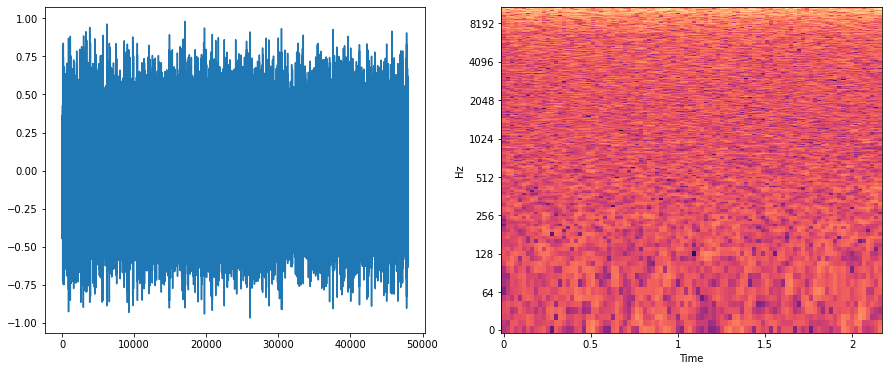

In [141]:
b = [0.3]
a = [1, 0.8]
data_filtered2 = sp.signal.lfilter(b, a, data)
ipd.Audio(data_filtered,rate=sr)

plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(data_filtered)

plt.subplot(1,2,2)
STFT_filtered = abs(librosa.stft(data_filtered))
STFT_db_filtered = librosa.amplitude_to_db(abs(STFT_filtered), ref=np.max)
img = librosa.display.specshow(STFT_db_filtered,
                               y_axis='log',
                               x_axis='time')

In [142]:
ipd.Audio(data_filtered,rate=sr)